In [1]:
### Importação das Bibliotecas

import requests                     # extração dos dados da API
import json                         # extração dos dados da API
import pandas as pd                 # estruturação dos dados
import seaborn as sns               # parte gráfica para análise de dados
import matplotlib.pyplot as plt     # parte gráfica para análise de dados
from wordcloud import WordCloud     # parte gráfica para análise de dados

In [3]:
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

df = pd.DataFrame(dados)
df.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,Abou Anni,UNIÃO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,56,https://www.camara.leg.br/internet/deputado/ba...,None
2,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,56,https://www.camara.leg.br/internet/deputado/ba...,None
3,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,56,https://www.camara.leg.br/internet/deputado/ba...,None
4,121948,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriano do Baldy,PP,https://dadosabertos.camara.leg.br/api/v2/part...,GO,56,https://www.camara.leg.br/internet/deputado/ba...,None


[]

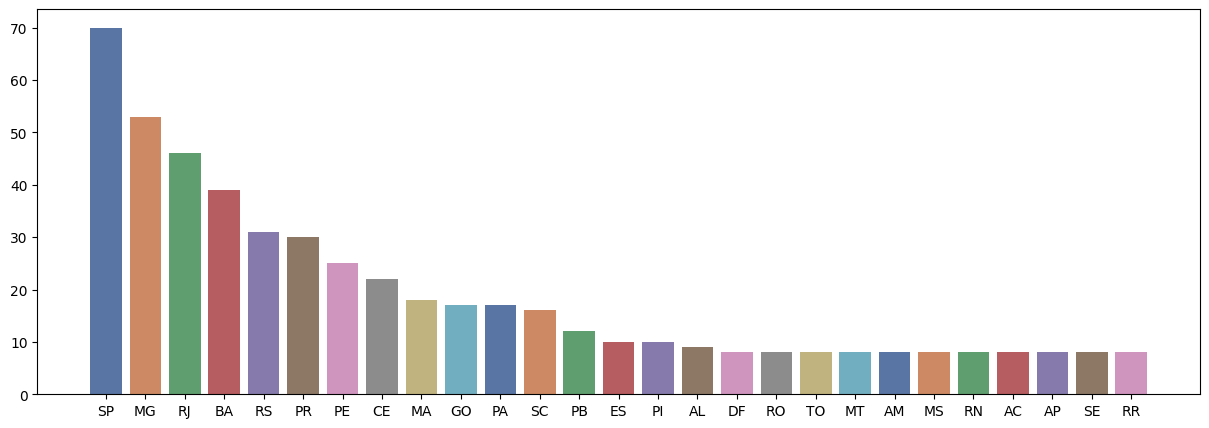

In [4]:
# Análise da quantidade de deputados pela UF
x = df['siglaUf'].value_counts().index
y = df['siglaUf'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

[]

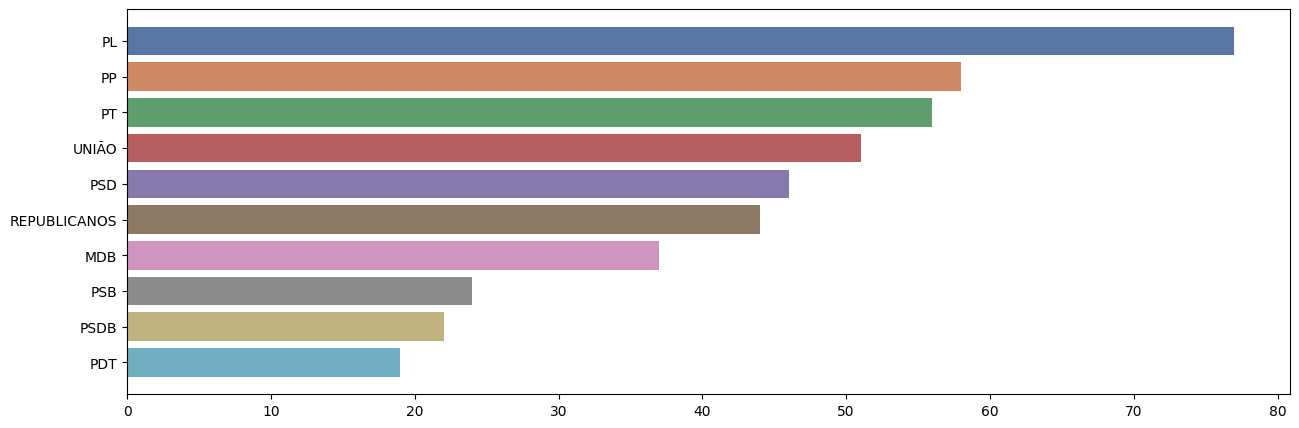

In [5]:
# Análise da quantidade de deputados por Partido
x = df['siglaPartido'].value_counts().head(10).values
y = df['siglaPartido'].value_counts().head(10).index
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

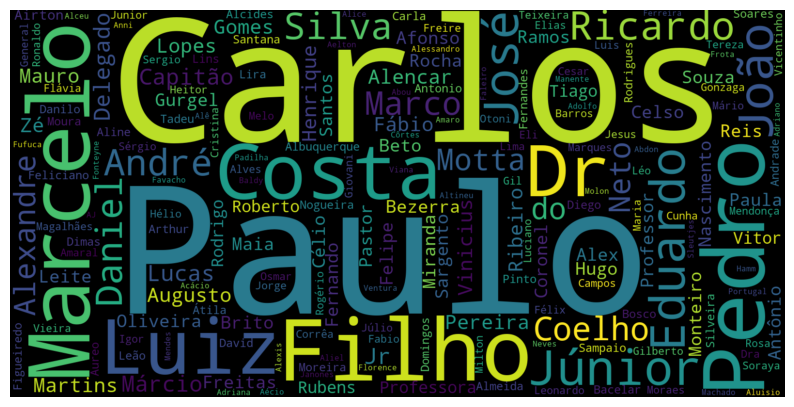

In [6]:
# Análise de nomes de deputados mais comuns
todos_itens = ' '.join(s for s in df['nome'].values)
stop_words = ['de','da']
 
# criar uma wordcloud
wc = WordCloud(stopwords=stop_words, 
               background_color="black",
               width=1600, height=800)
wordcloud = wc.generate(todos_itens)
 
# plotar wordcloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
